### augmentation trials

In [1]:
# import ligraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread, imresize


%matplotlib inline

In [2]:
# load test image
image_path = 'data/data_road/training/image_2/um_000000.png'
# load test ground truth
gt_path ='data/data_road/training/gt_image_2/um_road_000000.png'
image = imread(image_path)
gt_image = imread(gt_path)

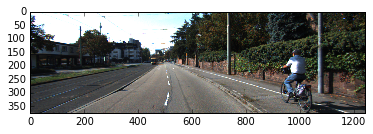

In [3]:
# show image
plt.imshow(image)

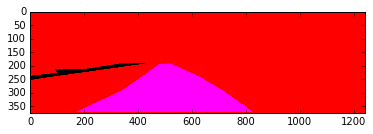

In [4]:
# show ground truth
plt.imshow(gt_image)

### Flip augmentation

Chooses to flip with probability of 0.5

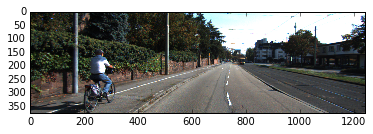

In [5]:
# flip image
image_flip = np.fliplr(image)

#show flipped image
plt.imshow(image_flip)

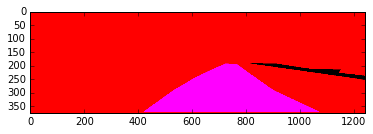

In [6]:
# flip ground truth
gt_flip = np.fliplr(gt_image)

# show flipped ground truth
plt.imshow(gt_flip)

### Translation Augmentation

Translate horizontally (randomly) between -20 to 20 pixels

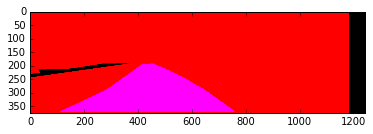

In [59]:
import cv2

# translate horizontally (randomly) between -200 to 200 pixels
trans_size = 200
trans = int(np.random.uniform(-trans_size, trans_size, 1))

Trans_M = np.float32([[1,0,trans],[0,1,0]])
rows, cols, chan = image.shape
transformed_img = cv2.warpAffine(gt_image, Trans_M, (cols, rows))

plt.imshow(transformed_img)

In [165]:
# augmentation function
def augment_image(image):
    """Apply augmentation operation to image"""

    rows, cols, _ = image.shape
    # flip image:
    if np.random.random() > 0.5:
        image = np.fliplr(image)

    # apply horizontal translation between -200 to 200 pixels
    trans_size = 200
    trans = int(np.random.uniform(-trans_size, trans_size, 1))

    trans_M = np.float32([[1,0,trans],[0,1,0]])
    image = cv2.warpAffine(image, trans_M, (cols, rows))
    
    if np.random.random() > 0.5:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        random_bright = .25+np.random.uniform()
        
        # scaling up or down the V channel of HSV
        image[:,:,2] = image[:,:,2]*random_bright
        image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

    return image

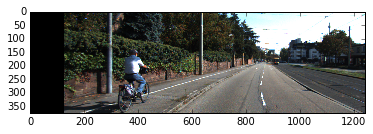

In [182]:
aug_image = augment_image(image)
plt.imshow(aug_image)